### 지역별 빈집비율 평균 및 감소지역 빈집확인
    - 데이터 출처
        - 통계청(인구총조사과), 2021, 2022.12.27, 빈집비율(시도/시/군/구)
        - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL202005&conn_path=I2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [53]:
space_h = pd.read_csv("./data/전국_빈집.csv")

In [54]:
space_h.columns = ["행정구역별(시군구)","빈집비율","빈집수(호)","전체주택(호)"]

In [55]:
locations = ["부산광역시 동구", "부산광역시 서구", "부산광역시 영도구", "대구광역시 남구","대구광역시 서구", "인천광역시 강화군", "인천광역시 옹진군",
            "경기도 가평군", "경기도 연천군", "강원도 고성군", "강원도 삼척시", "강원도 양구군", "강원도 양양군", "강원도 영월군", "강원도 정선군", 
            "강원도 철원군", "강원도 태백시", "강원도 평창군", "강원도 홍천군", "강원도 화천군", "강원도 횡성군", "충청북도 괴산군", "충청북도 단양군",
            "충청북도 보은군", "충청북도 영동군", "충청북도 옥천군", "충청북도 제천시", "충청남도 공주시", "충청남도 금산군", "충청남도 논산시", "충청남도 보령시", 
            "충청남도 부여군", "충청남도 서천군", "충청남도 예산군", "충청남도 청양군", "충청남도 태안군", "전라북도 고창군", "전라북도 김제시", "전라북도 남원시", 
            "전라북도 무주군", "전라북도 부안군", "전라북도 순창군", "전라북도 임실군", "전라북도 장수군", "전라북도 정읍시", "전라북도 진안군", "전라남도 강진군", 
            "전라남도 고흥군", "전라남도 곡성군", "전라남도 구례군", "전라남도 담양군", "전라남도 보성군", "전라남도 신안군", "전라남도 영광군", "전라남도 영암군", 
            "전라남도 완도군", "전라남도 장성군", "전라남도 장흥군", "전라남도 진도군", "전라남도 함평군", "전라남도 해남군", "전라남도 화순군", "경상북도 고령군", 
            "경상북도 군위군", "경상북도 문경시", "경상북도 봉화군", "경상북도 상주시", "경상북도 성주군", "경상북도 안동시", "경상북도 영덕군", "경상북도 영양군", 
            "경상북도 영주시", "경상북도 영천시", "경상북도 울릉군", "경상북도 울진군", "경상북도 의성군", "경상북도 청도군", "경상북도 청송군", "경상남도 거창군",
            "경상남도 고성군", "경상남도 남해군", "경상남도 밀양시", "경상남도 산청군", "경상남도 의령군", "경상남도 창녕군", "경상남도 하동군", "경상남도 함안군", 
            "경상남도 함양군", "경상남도 합천군"]

attention_locations = ["대전광역시 동구","인천광역시 동구", "부산광역시 중구","부산광역시 금정구","경상남도 통영시","강원도 강릉시","강원도 동해시","경상북도 경주시",
                       "경상남도 사천시","경상북도 김천시","대전광역시 대덕구", "강원도 인제군","전라북도 익산시","경기도 동두천시","강원도 속초시","경기도 포천시",
                      "광주광역시 동구","대전광역시 중구"]

In [56]:
len(attention_locations)

18

In [57]:
idx = []
for loc in locations:
    i = space_h[space_h["행정구역별(시군구)"]==loc].index
    idx.extend(i)
dan_loc = space_h.iloc[idx]
dan_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 2 to 232
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역별(시군구)  89 non-null     object 
 1   빈집비율        89 non-null     float64
 2   빈집수(호)      89 non-null     int64  
 3   전체주택(호)     89 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [58]:
space_h.drop(idx,axis=0,inplace=True)
space_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 222
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역별(시군구)  144 non-null    object 
 1   빈집비율        144 non-null    float64
 2   빈집수(호)      144 non-null    int64  
 3   전체주택(호)     144 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.6+ KB


In [59]:
dan_loc.index = np.arange(0,89)
space_h.index = np.arange(0,144)

In [60]:
idx = []
for loc in attention_locations:
    i = space_h[space_h["행정구역별(시군구)"]==loc].index
    idx.extend(i)
att_loc = space_h.iloc[idx]
att_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 32 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역별(시군구)  18 non-null     object 
 1   빈집비율        18 non-null     float64
 2   빈집수(호)      18 non-null     int64  
 3   전체주택(호)     18 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 720.0+ bytes


In [61]:
space_h.drop(idx,axis=0,inplace=True)
space_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 1 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역별(시군구)  126 non-null    object 
 1   빈집비율        126 non-null    float64
 2   빈집수(호)      126 non-null    int64  
 3   전체주택(호)     126 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.9+ KB


In [62]:
att_loc.index = np.arange(0,18)
space_h.index = np.arange(0,126)

In [63]:
safe_loc = space_h

In [64]:
dan_loc.rename(columns={"2020":"빈집_2020"})

,행정구역별(시군구),빈집비율,빈집수(호),전체주택(호)
0,부산광역시 동구,11.6,3902,33775
1,부산광역시 서구,10.2,4241,41592
2,부산광역시 영도구,10.9,5087,46617
3,대구광역시 남구,6.5,2782,42607
4,대구광역시 서구,2.9,1505,51379
...,...,...,...,...
84,경상남도 창녕군,14.5,4054,28031
85,경상남도 하동군,13.5,2748,20413
86,경상남도 함안군,12.3,3432,28005
87,경상남도 함양군,17.0,3217,18891


In [65]:
pop_data = pd.read_csv("./data/total_sido_pop_utf.csv")

In [66]:
pop_data = pop_data[["sigungu","2020"]]

In [67]:
pop_data.columns =["행정구역별(시군구)","인구_2020"]

In [68]:
bin_pop = pd.merge(dan_loc,pop_data,how="inner",on ="행정구역별(시군구)")

In [69]:
bin_pop.isnull().sum()

행정구역별(시군구)    0
빈집비율          0
빈집수(호)        0
전체주택(호)       0
인구_2020       0
dtype: int64

In [71]:
bin_pop.head()

,행정구역별(시군구),빈집비율,빈집수(호),전체주택(호),인구_2020
0,부산광역시 동구,11.6,3902,33775,86801.0
1,부산광역시 서구,10.2,4241,41592,105948.0
2,부산광역시 영도구,10.9,5087,46617,113042.5
3,대구광역시 남구,6.5,2782,42607,145124.0
4,대구광역시 서구,2.9,1505,51379,170922.5


In [116]:
#bin_pop.to_csv("./data/빈집데이터_최종.csv")

In [115]:
bin_pop[bin_pop["인구_2020"]>140000]

,행정구역별(시군구),빈집비율,빈집수(호),전체주택(호),인구_2020
3,대구광역시 남구,6.5,2782,42607,145124.0
4,대구광역시 서구,2.9,1505,51379,170922.5
68,경상북도 안동시,14.8,10371,69997,158634.0


<Figure size 700x700 with 0 Axes>

<AxesSubplot:xlabel='인구_2020', ylabel='빈집비율'>

Text(133124.0, 6.8, '대구광역시 남구')

Text(158922.5, 3.1999999999999997, '대구광역시 서구')

Text(19627.5, 24.0, '강원도 양양군')

Text(33489.0, 25.5, '강원도 평창군')

Text(55651.0, 21.8, '전라남도 영암군')

Text(146634.0, 15.100000000000001, '경상북도 안동시')

Text(32278.5, 19.799999999999997, '경상북도 청도군')

Text(29004.5, 21.8, '경상남도 남해군')

Text(34159.5, 20.8, '경상남도 합천군')

Text(0.5, 1.0, '인구수 대비 빈집비율(2020년)')

Text(0.5, 0, '인구수(명)')

Text(0, 0.5, '빈집비율')

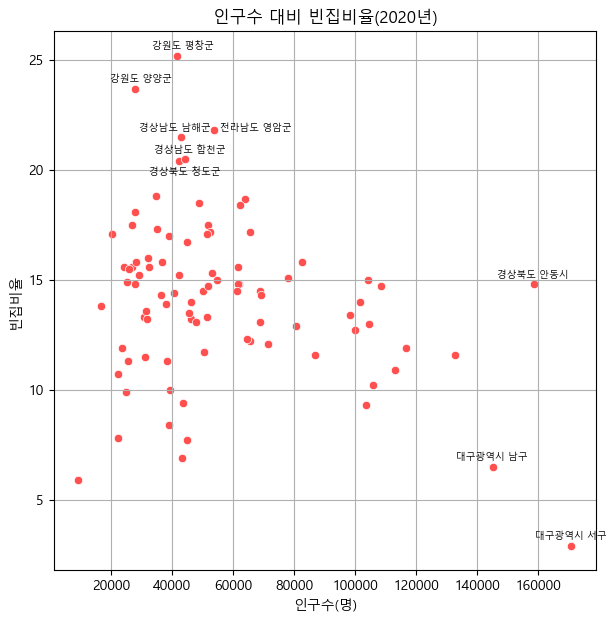

In [127]:
plt.figure(figsize=(7,7))
sns.scatterplot(data = bin_pop, x = "인구_2020",y = "빈집비율", color = "#ff5050")
for i in range(len(bin_pop)): # 행 개수만큼 순회
    row = bin_pop.iloc[i] # 한 행씩 꺼내기
    name = row['행정구역별(시군구)'] # 이름이 저장된 열
    x = row['인구_2020'] # x좌표가 저장된 열
    y = row['빈집비율'] # y좌표가 저장된 열
    if name in ['강원도 양양군','강원도 평창군']:
        plt.text(x-8000, y+0.3, name, fontsize=7)
    elif name in ['전라남도 영암군']:
        plt.text(x+2000, y, name, fontsize=7)
    elif name in ["경상남도 남해군"]:
        plt.text(x-14000, y+0.3, name, fontsize=7)     
    elif name in ["경상남도 합천군"]:
        plt.text(x-10000, y+0.3, name, fontsize=7)   
    elif name in ["경상북도 청도군"]:
        plt.text(x-10000, y-0.6, name, fontsize=7)   
    elif name in ["대구광역시 남구", "대구광역시 서구","경상북도 안동시"]:
        plt.text(x-12000, y+0.3, name, fontsize=7)   
    elif name in ["대구광역시 서구"]:
        plt.text(x-80000, y+0.3, name, fontsize=7)  
    else :
        pass    
plt.title("인구수 대비 빈집비율(2020년)")
plt.xlabel("인구수(명)")
plt.ylabel("빈집비율")
plt.grid()
plt.savefig("./output/인구수 대비 빈집비율(2020년).png")

In [140]:
bin_pop[bin_pop["빈집비율"]>20]

,행정구역별(시군구),빈집비율,빈집수(호),전체주택(호),인구_2020
12,강원도 양양군,23.7,3414,14401,27627.5
17,강원도 평창군,25.2,5504,21801,41489.0
54,전라남도 영암군,21.8,5981,27410,53651.0
76,경상북도 청도군,20.4,4435,21748,42278.5
80,경상남도 남해군,21.5,4929,22950,43004.5
88,경상남도 합천군,20.5,4794,23435,44159.5


<Figure size 700x700 with 0 Axes>

<AxesSubplot:xlabel='전체주택(호)', ylabel='빈집비율'>

Text(46879, 3.3, '대구광역시 서구')

Text(9901, 24.099999999999998, '강원도 양양군')

Text(17301, 25.599999999999998, '강원도 평창군')

Text(53340, 12.0, '충청북도 제천시')

Text(24110, 22.1, '전라남도 영암군')

Text(65497, 15.200000000000001, '경상북도 안동시')

Text(16248, 19.799999999999997, '경상북도 청도군')

Text(16450, 21.8, '경상남도 남해군')

Text(17935, 20.8, '경상남도 합천군')

Text(0.5, 1.0, '전체 주택수 대비 빈집비율(2020년)')

Text(0.5, 0, '전체주택(호)')

Text(0, 0.5, '빈집비율')

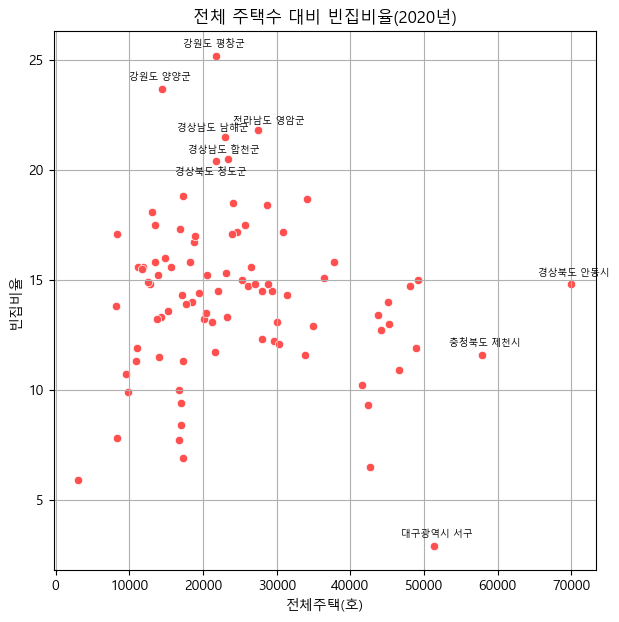

In [161]:
plt.figure(figsize=(7,7))
sns.scatterplot(data = bin_pop, x = "전체주택(호)",y = "빈집비율", color = "#ff5050")
for i in range(len(bin_pop)): # 행 개수만큼 순회
    row = bin_pop.iloc[i] # 한 행씩 꺼내기
    name = row['행정구역별(시군구)'] # 이름이 저장된 열
    x = row['전체주택(호)'] # x좌표가 저장된 열
    y = row['빈집비율'] # y좌표가 저장된 열
    if name in ["대구광역시 서구", "충청북도 제천시","경상북도 안동시"]:
        plt.text(x-4500, y+0.4, name, fontsize=7) 
    elif name in ['강원도 양양군',"강원도 평창군"]:
        plt.text(x-4500, y+0.4, name, fontsize=7) 
    elif name in ["전라남도 영암군"]:
        plt.text(x-3300, y+0.3, name, fontsize=7) 
    elif name in ["경상남도 남해군"]:
        plt.text(x-6500, y+0.3, name, fontsize=7) 
    elif name in ["경상남도 합천군"]:
        plt.text(x-5500, y+0.3, name, fontsize=7) 
    elif name in ["경상북도 청도군"]:
        plt.text(x-5500, y-0.6, name, fontsize=7) 
    else :
        pass    
plt.title("전체 주택수 대비 빈집비율(2020년)")
plt.xlabel("전체주택(호)")
plt.ylabel("빈집비율")
plt.grid()
plt.savefig("./output/전체 주택수 대비 빈집비율(2020년)r.png")